# Formato del dataset de nubes

En este notebook se va a limpiar el dataset de las nubes de forma que nos quedemos solamente con **Cirros, Altocumulos, Altostratos** y **Estratocumulo**.

Se va a guardar un dataframe de `pandas` en el disco en formato `.pkl` con las clases anteriormente mencionadas.

Cada imagen del dataset (256x256) va a ser partida en patches de (32x32). Estos patches van a ser etiquetados como nubes (dependiendo de su clase) o como cielo.

In [1]:
from sklearn.externals import joblib

import pandas as pd
import numpy as np
import netCDF4

Obtener los datos del dataset en formato Numpy y obtener un Dataframe de `pandas`.

In [2]:
clouds_nc = netCDF4.Dataset('data/TSIdatasetToCarlosIIISet600_20160609.nc')

datestr = np.array(clouds_nc.variables.get('dateStr'))
cloud_type = np.array(clouds_nc.variables.get('cloudType'))
imgs_proy = np.array(clouds_nc.variables.get('imgsProy')).reshape(717, 256*256*3)

clouds_pd = pd.concat([
    pd.DataFrame({
        'datestr' : datestr,
        'cloud_type' : cloud_type,
    }), 
    pd.DataFrame(imgs_proy, columns=range(256*256*3))], 
    axis=1)

clouds_pd.head()

,cloud_type,datestr,0,1,2,3,4,5,6,7,...,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607
0,altocumulos,20130302082100,152,169,187,152,169,187,150,169,...,255,255,255,255,255,255,255,255,255,255
1,altocumulos,20130315123030,78,112,139,78,112,139,81,115,...,164,92,138,164,92,138,164,92,138,164
2,altocumulos,20130315124730,83,114,142,83,114,142,83,114,...,200,159,185,200,159,185,200,159,185,200
3,altocumulos,20130315133030,58,96,132,58,96,132,58,96,...,145,82,119,145,82,119,145,82,119,145
4,altocumulos,20141102105928,114,131,147,114,131,147,115,133,...,173,137,161,173,137,161,173,137,161,173


Una vez que tenemos el DataFrame, vamos a visualizar una de las imagenes.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

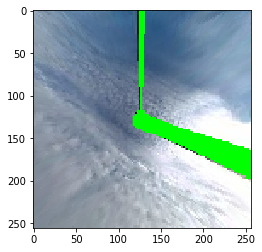

In [4]:
plt.imshow(clouds_pd.iloc[0, 2:].values.reshape((256,256,3)).astype('uint8'))
plt.show()

Se eliminan todas aquellas nubes que no sean: **Cirros, Altocumulos, Altostratos** y **Estratocumulos**.

In [5]:
print('- Initial clouds: {}'.format(np.unique(clouds_pd.cloud_type.values)))

cloud_names = ['cirros', 'altocumulos', 'altostratos', 'estratocumulos']
clouds_pd = clouds_pd[clouds_pd.cloud_type.isin(cloud_names)]

print('\n- Target clouds: {}'.format(np.unique(clouds_pd.cloud_type.values)))
print('\n- Dataset size: {}'.format(clouds_pd.shape))

- Initial clouds: ['altocumulos' 'altostratos' 'cieloDespejado' 'cirrocumulos' 'cirros'
 'cirrostratos' 'cumulos' 'estratocumulos' 'estratos' 'multinube'
 'nimbostratos']

- Target clouds: ['altocumulos' 'altostratos' 'cirros' 'estratocumulos']

- Dataset size: (312, 196610)


Se itera sobre el Dataframe, se calculan los patches de **(32x32)** y se decide si son nube o cielo.

In [60]:
from imutils import helpers

clouds_final_pd = pd.DataFrame(columns=['cloud_type', 'datestr', *range(32*32*3)])
for index, row in clouds_pd.iterrows():
    print('- Row number: {}'.format(index))
    img = row.iloc[2:].values.reshape((256,256,3)).astype('uint8')
    
    for _, _, roi in helpers.sliding_window(img, (32, 32), stepSize=32):
        cloud_ratio = np.sum(roi[:,:,0] / roi[:,:,2]) / float(32*32*3)
        cloud_type = row['cloud_type'] if cloud_ratio >= 0.82 else 'sky'
        
        _row = pd.Series([cloud_type, row['datestr'], *roi.flatten()],
                         index=['cloud_type', 'datestr', *range(32*32*3)])
        clouds_final_pd = clouds_final_pd.append(_row, ignore_index=True)

- Row number: 0


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


- Row number: 1
- Row number: 2
- Row number: 3
- Row number: 4
- Row number: 5
- Row number: 6
- Row number: 7


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


- Row number: 8
- Row number: 9
- Row number: 10
- Row number: 11
- Row number: 12
- Row number: 13
- Row number: 14
- Row number: 15
- Row number: 16
- Row number: 17
- Row number: 18
- Row number: 19
- Row number: 20
- Row number: 21
- Row number: 22
- Row number: 23
- Row number: 24
- Row number: 25
- Row number: 26
- Row number: 27
- Row number: 28
- Row number: 29
- Row number: 30
- Row number: 31
- Row number: 32
- Row number: 33
- Row number: 34
- Row number: 35
- Row number: 36
- Row number: 37
- Row number: 38
- Row number: 39
- Row number: 40
- Row number: 41
- Row number: 42
- Row number: 43
- Row number: 44
- Row number: 45
- Row number: 46
- Row number: 47
- Row number: 48
- Row number: 49
- Row number: 50
- Row number: 51
- Row number: 52
- Row number: 53
- Row number: 54
- Row number: 55
- Row number: 56
- Row number: 57
- Row number: 58
- Row number: 59
- Row number: 60
- Row number: 61
- Row number: 62
- Row number: 63
- Row number: 64
- Row number: 65
- Row number: 66

En este momento se tienen los datos almacenados en el **DataFrame** en patches de (32x32). Etiquetados en **Cirros, Altocumulos, Altostratos, Estratocumulos** y **sky**.

Se va a mostrar uno de los patches para ver que aspecto tienen.

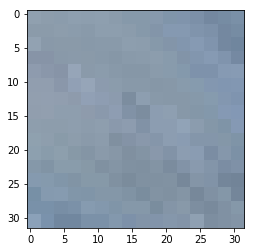

In [68]:
plt.imshow(clouds_final_pd.iloc[8,2:].values.reshape((32,32,3)).astype('uint8'))
plt.show()

In [71]:
print('- Dataset shape: {}'.format(clouds_final_pd.shape))
clouds_final_pd.head()

- Dataset shape: (19968, 3074)


,cloud_type,datestr,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,sky,20130302082100,152,169,187,152,169,187,150,169,...,166,121,143,166,119,141,164,119,141,164
1,sky,20130302082100,111,138,165,111,138,165,106,135,...,157,98,127,157,93,122,154,93,122,154
2,sky,20130302082100,100,130,166,100,130,166,96,129,...,142,70,104,142,67,101,139,67,101,139
3,sky,20130302082100,63,105,145,63,105,145,62,106,...,0,0,255,0,0,255,0,0,255,0
4,sky,20130302082100,0,255,0,0,255,0,0,255,...,139,55,91,139,54,90,138,54,90,138


Finalmente se guarda el dataset en el disco en formato `pkl`

In [72]:
joblib.dump(clouds_final_pd, 'data/clouds.pkl')

['data/clouds.pkl']